In [35]:
import pandas as pd
import numpy as np
data = pd.read_csv('perfume.csv')

Basic data overview using pandas

In [8]:
data.shape
# data.drop() #columns
# data.nlargest()
# data.isnull().sum()
# data.url.unique()
# data.nunique(axis=0)
# brand_data = data.groupby('brand').count()
# brand_data.sort_values(by='brand')
# data.Tags.value_counts()
# max, mean, median, min, mode, quantile, rank, round, sum, std, var
# Df = df[x < 50] filtering 
# data.columns
# data.info()

(968, 16)

In [36]:
data = data.drop('Unnamed: 14', axis = 1)

In [38]:
# COMBINES ALL NOTES TOGETHER INTO NEW COLUMN 'allnotes'
def concatenate_notes(row):
    note_parts = []
    if not pd.isnull(row['topnotes']):
        note_parts.append(str(row['topnotes']))
    if not pd.isnull(row['midnotes']):
        note_parts.append(str(row['midnotes']))
    if not pd.isnull(row['basenotes']):
        note_parts.append(str(row['basenotes']))
    if not pd.isnull(row['Notes']):
        note_parts.append(str(row['Notes']))
    
    concatenated_string = ', '.join(note_parts)
    # Remove '[' and ']' if present
    concatenated_string = concatenated_string.replace('[', '').replace(']', '')
    # Add brackets around the entire string
    concatenated_string = '[' + concatenated_string + ']'
    return concatenated_string

data['allnotes'] = data.apply(concatenate_notes, axis=1)

data

,url,href,name,brand,description,category,badges,prices,topnotes,midnotes,basenotes,Notes,Tags,Style,similar_perfumes,allnotes
0,https://bloomperfume.co.uk/products/salted-gre...,salted-green-mango,Salted Green Mango,Strangers Parfumerie,Bao Mangos and Childhood,NaN,"['Bestseller', 'Exclusive']","['£80.00, 30 ml EdP', '£4.00, 1 ml EdP', '6 to...",NaN,NaN,NaN,"['Guava Leaves', 'Vetiver', 'Chili', 'Bigarade...",['#Fresh'],"['For Him', 'Unisex', 'For Her']","['antigua', 'manguier-metisse', 'oliver', 'sun...","['Guava Leaves', 'Vetiver', 'Chili', 'Bigarade..."
1,https://bloomperfume.co.uk/products/memoirs-of...,memoirs-of-a-trespasser,Memoirs of a Trespasser,Imaginary Authors,Smoky Vanilla,"['Edible', 'Woody']",['Bestseller'],"['£90.00, 50 ml EdP', '£3.00, 1 ml EdP', '4 to...",NaN,NaN,NaN,"['Madagascar Vanilla', 'Ambrette Seeds', 'Cogn...","['#Sweet', '#Sexy']","['For Him', 'Unisex', 'For Her']","['vanilla-shot', 'anima-dulcis', 'vi-et-armis'...","['Madagascar Vanilla', 'Ambrette Seeds', 'Cogn..."
2,https://bloomperfume.co.uk/products/falling-in...,falling-into-the-sea,Falling into the Sea,Imaginary Authors,Salty sunny and zesty,NaN,['Bestseller'],"['£90.00, 50 ml EdP', '£3.00, 1 ml EdP', '4 to...",NaN,NaN,NaN,"['Sea Salt', 'Sea Spray', 'Bergamot', 'Hot San...",['#Sexy'],"['For Him', 'Unisex', 'For Her']","['arancia-di-sicilia', 'still-life-in-rio', 'c...","['Sea Salt', 'Sea Spray', 'Bergamot', 'Hot San..."
3,https://bloomperfume.co.uk/products/t-rex,t-rex,T-Rex,Zoologist,Indolic Smoky Floral,NaN,"['Bestseller', 'Exclusive']","['£210.00, 60 ml Extrait de Parfum', '£7.00, 1...","['Black Pepper', 'Fir Balsam', 'Bergamot', 'Nu...","['Osmanthus', 'Ylang-Ylang', 'Champaca', 'Smok...","['Madagascar Vanilla', 'Frankincense', 'Cade',...",NaN,"['#Animalic', '#Smoky', '#Beast']","['For Him', 'Unisex', 'For Her']","['a-city-on-fire', 'chetyre', 'oud-imperial-ex...","['Black Pepper', 'Fir Balsam', 'Bergamot', 'Nu..."
4,https://bloomperfume.co.uk/products/bee,bee,Bee,Zoologist,Dense Sweet Leather,"['Edible', 'Leather', 'Woody']","['Bestseller', 'Exclusive']","['£210.00, 60 ml Extrait de Parfum', '£7.00, 1...","['Candied Orange', 'Royal Jelly Accord', 'Ging...","['Broom', 'Honey', 'Mimosa', 'Heliotrope', 'Or...","['Sandalwood', 'Benzoin', 'Labdanum', 'Tonka B...",NaN,"['#Animalic', '#Sweet', '#Beast']","['For Him', 'Unisex', 'For Her']","['choeur-des-anges', 'opulent-wood', 'or-du-sr...","['Candied Orange', 'Royal Jelly Accord', 'Ging..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,https://bloomperfume.co.uk/products/garofano,garofano,Garofano,Lorenzo Villoresi,NaN,"['Floral', 'Spicy', 'Vintage/Old School']",['New'],"['£135.00, 100 ml EdT', '£4.00, 1 ml EdT', '3 ...",NaN,NaN,NaN,"['Spices', 'Rose', 'Carnation', 'Geranium']","['#Fresh', '#Sweet']",['Unisex'],"['sweet-william', '500-years', 'sleight-of-fer...","['Spices', 'Rose', 'Carnation', 'Geranium']"
964,https://bloomperfume.co.uk/products/perfume-se...,perfume-set-4-18-ml,Perfume set,Aura of Kazakhstan,NaN,"['Aromatic', 'Fruity', 'Unconventional', 'Woody']","['Exclusive', 'New']","['£295.00, 4x18 ml EdP']",NaN,NaN,NaN,"['Crude Oil', 'Vetiver', 'Apple', 'Nutmeg', 'H...","['#Sweet', '#Sexy', '#Smoky', '#Beast']",['Unisex'],"['travel-set', 'short-stories-set', '4-seasons...","['Crude Oil', 'Vetiver', 'Apple', 'Nutmeg', 'H..."
965,https://bloomperfume.co.uk/products/tonkamande,tonkamande,Tonkamande (Discontinued),Pierre Guillaume - Parfumerie Générale,Balmy Aldehydes,"['Edible', 'Transparent']",[],"['£117.50, 100 ml EdP', '£81.50, 50 ml EdP', '...",['Almond'],['Aldehydes'],"['Tonka Beans', 'Wheat', 'Amber']",NaN,NaN,['For Her'],"['lumire-blanche', 'tardes', 'joking-aside', '...","['Almond', 'Aldehydes', 'Tonka Beans', 'Wheat'..."
966,https://bloomperfume.co.uk/products/corps-et-ames,corps-et-ames,Corps et Ames (Discontinued),Pierre Guillaume - Parfumerie Générale,Feminine Chypre,"['Green', 'Transparent']",[],"['£117.50, 100 ml EdP', '£81.50, 50 ml EdP', '...","['Verb

In [7]:
# separated the perfumes from the sample packs into 2 separate dataframes
# simple check that the numbers add up 
print(data.shape)
filter1 = data.brand.str.contains('Pack')==False
filter2 = data.href.str.contains('-set')==False
filter3 = data.name.str.contains('Sanitizer')==False
combined = filter1 & filter2 & filter3
perfume_df = data[combined]

print(perfume_df.shape)

perfume_df['formula'] = np.where(perfume_df.prices.str.contains('EdP'), 'EdP',
                                np.where(perfume_df.prices.str.contains('Eau de Cologne'), 'EdC',
                                        np.where(perfume_df.prices.str.contains('EdC'), 'EdC',
                                                np.where(perfume_df.prices.str.contains('EdT'), 'EdT',
                                                        np.where(perfume_df.prices.str.contains('Parfum'), 'Extrait', 'None')))))



perfume_df = perfume_df.replace(r'£|\[|\]|\'|\"|\?|\#|roll-on', '', regex=True)
# perfume_df = perfume_df.prices.replace(r'EdP\', |EdT\', |Extrait de |Eau de Cologne', '', regex=True) Eau de Cologne
perfume_df.prices = perfume_df.prices.replace(r'EdP|EdT|Extrait de Parfum|Eau de Cologne|EdC|Parfum| ml', '', regex=True)
perfume_df = perfume_df.apply(lambda x: x.str.strip())
# perfume_df


tag = ['Bestseller','Exclusive','For Him','For Her','Unisex','Sexy','Fresh','Sweet','Animalic','Powdery','Clean','Smoky','Normcore','Beast']
category = ['Aromatic','Floral','Green', 'Leather', 'Woody', 'Spicy','Edible', 'Unconventional', 'Citrusy', 'Fruity', 'Marine', 'Vintage/Old School', 'Transparent']
perfume_df['bestseller'] = perfume_df.badges.apply(lambda x: tag[0] in x)
perfume_df['exclusive'] = perfume_df.badges.apply(lambda x: tag[1] in x)
perfume_df.rename(columns={'Style':'gender'}, inplace=True)
perfume_df.gender = perfume_df.gender.astype(str)
perfume_df['for_him'] = perfume_df.gender.apply(lambda x: tag[2] in x)
perfume_df['for_her'] = perfume_df.gender.apply(lambda x: tag[3] in x)
perfume_df['unisex'] = perfume_df.gender.apply(lambda x: tag[4] in x)
perfume_df.rename(columns={'Tags':'tags'}, inplace=True)
perfume_df.tags = perfume_df.tags.astype(str)
perfume_df['sexy'] = perfume_df.tags.apply(lambda x: tag[5] in x)
perfume_df['fresh'] = perfume_df.tags.apply(lambda x: tag[6] in x)
perfume_df['sweet'] = perfume_df.tags.apply(lambda x: tag[7] in x)
perfume_df['animalic'] = perfume_df.tags.apply(lambda x: tag[8] in x)
perfume_df['powdery'] = perfume_df.tags.apply(lambda x: tag[9] in x)
perfume_df['clean'] = perfume_df.tags.apply(lambda x: tag[10] in x)
perfume_df['smoky'] = perfume_df.tags.apply(lambda x: tag[11] in x)
perfume_df['normcore'] = perfume_df.tags.apply(lambda x: tag[12] in x)
perfume_df['beast'] = perfume_df.tags.apply(lambda x: tag[13] in x)
perfume_df.category = perfume_df.category.astype(str)
perfume_df['aromatic'] = perfume_df.category.apply(lambda x: category[0] in x)
perfume_df['floral'] = perfume_df.category.apply(lambda x: category[1] in x)
perfume_df['green'] = perfume_df.category.apply(lambda x: category[2] in x)
perfume_df['leather'] = perfume_df.category.apply(lambda x: category[3] in x)
perfume_df['woody'] = perfume_df.category.apply(lambda x: category[4] in x)
perfume_df['spicy'] = perfume_df.category.apply(lambda x: category[5] in x)
perfume_df['edible'] = perfume_df.category.apply(lambda x: category[6] in x)
perfume_df['unconventional'] = perfume_df.category.apply(lambda x: category[7] in x)
perfume_df['citrusy'] = perfume_df.category.apply(lambda x: category[8] in x)
perfume_df['fruity'] = perfume_df.category.apply(lambda x: category[9] in x)
perfume_df['marine'] = perfume_df.category.apply(lambda x: category[10] in x)
perfume_df['vintage'] = perfume_df.category.apply(lambda x: category[11] in x)
perfume_df['transparent'] = perfume_df.category.apply(lambda x: category[12] in x)
perfume_df['allnotes'] = perfume_df.topnotes.astype(str) + ', ' + perfume_df.midnotes.astype(str) + ', ' + perfume_df.basenotes.astype(str) + ', ' + perfume_df.Notes.astype(str)

perfume_df

# pdf = data.where(data.brand.str.contains('Sample Packs')==True) only for whole object

(968, 15)
(925, 15)


/var/folders/wg/jpbtbjbs0v57v25k9syhsz440000gn/T/ipykernel_50959/3354364956.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perfume_df['formula'] = np.where(perfume_df.prices.str.contains('EdP'), 'EdP',


,url,href,name,brand,description,category,badges,prices,topnotes,midnotes,...,woody,spicy,edible,unconventional,citrusy,fruity,marine,vintage,transparent,allnotes
0,https://bloomperfume.co.uk/products/salted-gre...,salted-green-mango,Salted Green Mango,Strangers Parfumerie,Bao Mangos and Childhood,nan,"Bestseller, Exclusive","80.00, 30 , 4.00, 1 , 6 tokens, 10",NaN,NaN,...,False,False,False,False,False,False,False,False,False,"nan, nan, nan, Guava Leaves, Vetiver, Chili, B..."
1,https://bloomperfume.co.uk/products/memoirs-of...,memoirs-of-a-trespasser,Memoirs of a Trespasser,Imaginary Authors,Smoky Vanilla,"Edible, Woody",Bestseller,"90.00, 50 , 3.00, 1 , 4 tokens, 10",NaN,NaN,...,True,False,True,False,False,False,False,False,False,"nan, nan, nan, Madagascar Vanilla, Ambrette Se..."
2,https://bloomperfume.co.uk/products/falling-in...,falling-into-the-sea,Falling into the Sea,Imaginary Authors,Salty sunny and zesty,nan,Bestseller,"90.00, 50 , 3.00, 1 , 4 tokens, 10",NaN,NaN,...,False,False,False,False,False,False,False,False,False,"nan, nan, nan, Sea Salt, Sea Spray, Bergamot, ..."
3,https://bloomperfume.co.uk/products/t-rex,t-rex,T-Rex,Zoologist,Indolic Smoky Floral,nan,"Bestseller, Exclusive","210.00, 60 , 7.00, 1 , 7 tokens, 10","Black Pepper, Fir Balsam, Bergamot, Nutmeg, La...","Osmanthus, Ylang-Ylang, Champaca, Smoke, Damas...",...,False,False,False,False,False,False,False,False,False,"Black Pepper, Fir Balsam, Bergamot, Nutmeg, La..."
4,https://bloomperfume.co.uk/products/bee,bee,Bee,Zoologist,Dense Sweet Leather,"Edible, Leather, Woody","Bestseller, Exclusive","210.00, 60 , 7.00, 1 , 7 tokens, 10","Candied Orange, Royal Jelly Accord, Ginger","Broom, Honey, Mimosa, Heliotrope, Orange Blossom",...,True,False,True,False,False,False,False,False,False,"Candied Orange, Royal Jelly Accord, Ginger, Br..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,https://bloomperfume.co.uk/products/pralin-de-...,pralin-de-santal,Praliné de Santal (Discontinued),Pierre Guillaume - Parfumerie Générale,Burlesque Woody,"Edible, Woody",,"117.50, 100 , 81.50, 50 , 2.00, 1 Sample disc...",Hazelnut,"Heliotropine, Cedar",...,True,False,True,False,False,False,False,False,False,"Hazelnut, Heliotropine, Cedar, Cashmeran, Sand..."
963,https://bloomperfume.co.uk/products/garofano,garofano,Garofano,Lorenzo Villoresi,NaN,"Floral, Spicy, Vintage/Old School",New,"135.00, 100 , 4.00, 1 , 3 tokens, 10",NaN,NaN,...,False,True,False,False,False,False,False,True,False,"nan, nan, nan, Spices, Rose, Carnation, Geranium"
965,https://bloomperfume.co.uk/products/tonkamande,tonkamande,Tonkamande (Discontinued),Pierre Guillaume - Parfumerie Générale,Balmy Aldehydes,"Edible, Transparent",,"117.50, 100 , 81.50, 50 , 2.00, 1 Sample disc...",Almond,Aldehydes,...,False,False,True,False,False,False,False,False,True,"Almond, Aldehydes, Tonka Beans, Wheat, Amber, nan"
966,https://bloomperfume.co.uk/products/corps-et-ames,corps-et-ames,Corps et Ames (Discontinued),Pierre Guillaume - Parfumerie Générale,Feminine Chypre,"Green, Transparent",,"117.50, 100 , 81.50, 50 , 2.00, 1 Sample disc...","Verbena, Geranium","Jasmine Sambac, Patchouli",...,False,False,False,False,False,False,False,False,True,"Verbena, Geranium, Jasmine Sambac, Patchouli, ..."


The following code is to clean the 'prices' column into separate columns for perfume strength/formula and separate prices for different volume bottles on sale

In [8]:
# split the prices column by the string 'ml' and create a new dataframe to hold these
prices_list = perfume_df.prices.str.split(',')
# reversed the order of the lists so that the strength and the smallest column come first
prices_list = prices_list.apply(lambda x: list(reversed(x)))
# created a new dataframe with the split list 
df_prices = pd.DataFrame(prices_list.tolist()).fillna('').add_prefix('price_')
df_prices = df_prices.drop(['price_0', 'price_1', 'price_2', 'price_3'], axis = 1)
new_columns = ['v_1', 'p_1', 'v_2', 'p_2', 'v_3', 'p_3']
df_prices.columns = new_columns
df_prices = df_prices.apply(lambda x: x.str.strip())
# up_todate = pd.concat([df_prices, df_1, df_2, df_3], axis=1)

df_prices

,v_1,p_1,v_2,p_2,v_3,p_3
0,30,80.00,,,,
1,50,90.00,,,,
2,50,90.00,,,,
3,60,210.00,,,,
4,60,210.00,,,,
...,...,...,...,...,...,...
920,50,81.50,100,117.50,,
921,100,135.00,,,,
922,50,81.50,100,117.50,,
923,50,81.50,100,117.50,,


TO DO
- combine the following code (to_numeric)
- apply the regex cleaning to the original dataframe until only the commas are left - DONE
- create a column where samples 
- prices on is different because it is split a different way
- create the new dataframes with string split then concatenate them all together 
- clean the other columns in pandas: 
    - category
    - badges
    - style
    - notes 
    - similar perfumes
    - tags
- a column that combines all the notes as a new column 
- do the analysis with rbql - grouping
- then matplotlib / seaborn
- then can do some hypothesis testing with python - look at statology.org 
- you can use dbt with vscode - transformation as code defined as SQL scripts !! , write tests with DBT
- work out how to build a network diagram in R for the similar perfumes? orrr just use matplotlib 
- create a separate table for the graphs or analyses that you want 

In [9]:
# group by brand 
# some basic summary things 
# group by gender
# group by bestseller
# group by exclusive


# convert the table contents to numbers
df_prices.p_1 = pd.to_numeric(df_prices.p_1, errors='coerce')
df_prices.p_2 = pd.to_numeric(df_prices.p_2, errors='coerce')
df_prices.p_3 = pd.to_numeric(df_prices.p_3, errors='coerce')
df_prices.v_1 = pd.to_numeric(df_prices.v_1, errors='coerce')
df_prices.v_2 = pd.to_numeric(df_prices.v_2, errors='coerce')
df_prices.v_3 = pd.to_numeric(df_prices.v_3, errors='coerce')

df_prices

# calculate price per ml for each product
df_prices['ppml1'] = df_prices.p_1 / df_prices.v_1
df_prices.ppml1= df_prices.ppml1.round(1)
df_prices['ppml2'] = df_prices.p_2 / df_prices.v_2
df_prices.ppml2= df_prices.ppml2.round(1)
df_prices['ppml3'] = df_prices.p_3 / df_prices.v_3
df_prices.ppml3= df_prices.ppml3.round(1)
df_prices

# new column which takes the lowest value of ppm 1,2,3 and gives you a number 1,2, or 3

columns_to_check = ['ppml1', 'ppml2', 'ppml3']

def find_min_ppml(row):
    min_col = min(columns_to_check, key=lambda col: row[col])
    min_value = row[min_col]
    return min_col, min_value

df_prices[['cheapest_column', 'cheapest_value']] = df_prices.apply(find_min_ppml, axis=1, result_type='expand')
df_prices

,v_1,p_1,v_2,p_2,v_3,p_3,ppml1,ppml2,ppml3,cheapest_column,cheapest_value
0,30.0,80.0,NaN,NaN,NaN,NaN,2.7,NaN,NaN,ppml1,2.7
1,50.0,90.0,NaN,NaN,NaN,NaN,1.8,NaN,NaN,ppml1,1.8
2,50.0,90.0,NaN,NaN,NaN,NaN,1.8,NaN,NaN,ppml1,1.8
3,60.0,210.0,NaN,NaN,NaN,NaN,3.5,NaN,NaN,ppml1,3.5
4,60.0,210.0,NaN,NaN,NaN,NaN,3.5,NaN,NaN,ppml1,3.5
...,...,...,...,...,...,...,...,...,...,...,...
920,50.0,81.5,100.0,117.5,NaN,NaN,1.6,1.2,NaN,ppml2,1.2
921,100.0,135.0,NaN,NaN,NaN,NaN,1.4,NaN,NaN,ppml1,1.4
922,50.0,81.5,100.0,117.5,NaN,NaN,1.6,1.2,NaN,ppml2,1.2
923,50.0,81.5,100.0,117.5,NaN,NaN,1.6,1.2,NaN,ppml2,1.2


In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# concatenate it to the previous dataframe
up_todate = pd.concat([perfume_df, df_prices], axis=1)
up_todate.columns

grouped0 = up_todate.groupby('formula')['cheapest_value']#.mean().round(1)
grouped0
# grouped1 = up_todate.groupby(['brand', 'formula'])['cheapest_value'].mean().round(1)
# grouped2 = up_todate.groupby(['brand', 'formula'])['cheapest_value'].count()
# grouped = pd.concat([grouped1, grouped2], axis=1)
# grouped = pd.DataFrame(grouped)
# grouped.reset_index(inplace=True)
# grouped.columns.values[3] = 'count'

# # grouped.sort_values(by='brand')
# grouped

# edc = grouped[grouped.formula == 'EdC'].copy()
# edc.cheapest_value = pd.to_numeric(edc.cheapest_value)
# edc = edc.sort_values(by='cheapest_value')
# edc 

# edt = grouped[grouped.formula == 'EdT'].copy()
# edt.cheapest_value = pd.to_numeric(edt.cheapest_value)
# edt = edt.sort_values(by='cheapest_value')
# edt 

# edp = grouped[grouped.formula == 'EdP'].copy()
# edp.cheapest_value = pd.to_numeric(edp.cheapest_value)
# edp = edp.sort_values(by='cheapest_value')
# edp 

# parfum = grouped[grouped.formula == 'Extrait'].copy()
# parfum.cheapest_value = pd.to_numeric(parfum.cheapest_value)
# parfum = parfum.sort_values(by='cheapest_value')
# parfum 

#CHEAPEST VALUE IS WRONG??? 


                                     brand formula  cheapest_value  count
27                                  Floris     EdT             0.7      4
52                                Molinard     EdT             0.8      1
66                           Phaedon Paris     EdT             1.6     10
43                       Lorenzo Villoresi     EdT             1.8     14
68  Pierre Guillaume - Parfumerie Générale     EdT             1.9     20
17                                 Brocard     EdT             2.0     16
47                            Marie Jeanne     EdT             2.0      1
79                                 VORONOI     EdT             2.3     12


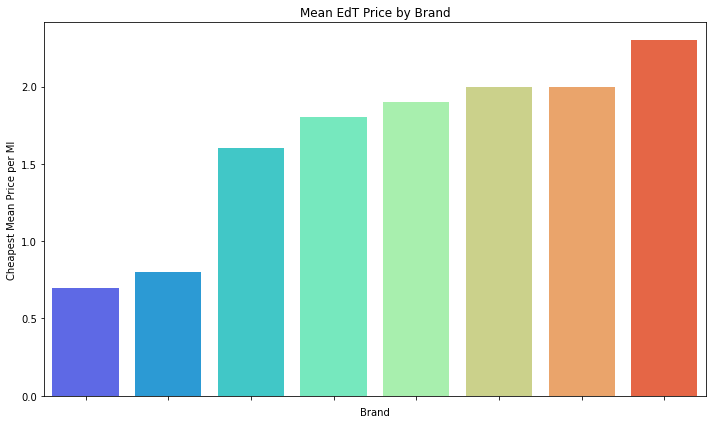

In [56]:
rainbow_palette = sns.color_palette("rainbow", len(edt))
print(edt)
plt.figure(figsize=(10, 6))
sns.barplot(data=edt, x='brand', y='cheapest_value', palette=rainbow_palette)
plt.xlabel('Brand')
plt.ylabel('Cheapest Mean Price per Ml')
plt.title('Mean EdT Price by Brand')
plt.xticks(rotation=45)
plt.gca().set_xticklabels([])
plt.tight_layout()
plt.show()

                   brand  formula  cheapest_value
74         Salvador Dali  Extrait             0.9
25    Etat Libre dOrange  Extrait             0.9
32             Houbigant  Extrait             1.2
35                 J.U.S  Extrait             1.2
54                Oddity  Extrait             1.4
5        Atelier des Ors  Extrait             1.5
39            Jul Et Mad  Extrait             1.7
58         Ormonde Jayne  Extrait             1.8
50          Mendittorosa  Extrait             1.8
23               Elisire  Extrait             1.9
59                  PRIN  Extrait             2.0
19                CARNER  Extrait             2.1
56      Olfactive Studio  Extrait             2.2
64    Perris Monte Carlo  Extrait             2.2
61       Parfum Prissana  Extrait             2.3
82             Zoologist  Extrait             2.3
12         Bogue Profumo  Extrait             2.6
77  Strangers Parfumerie  Extrait             3.4


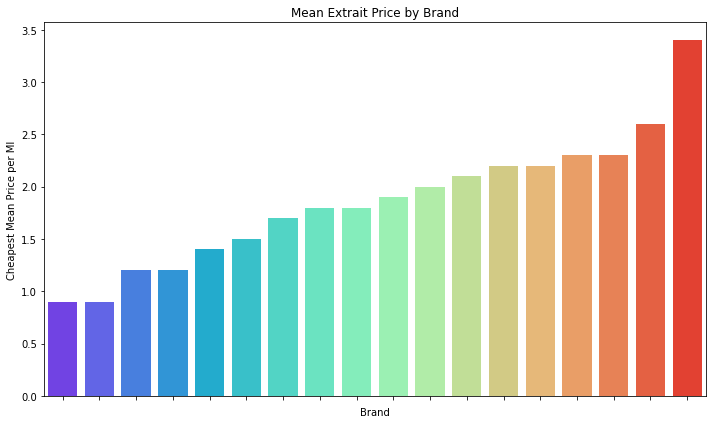

In [41]:

rainbow_palette = sns.color_palette("rainbow", len(parfum))
print(parfum)
plt.figure(figsize=(10, 6))
sns.barplot(data=parfum, x='brand', y='cheapest_value', palette=rainbow_palette)
plt.xlabel('Brand')
plt.ylabel('Cheapest Mean Price per Ml')
plt.title('Mean Extrait Price by Brand')
plt.xticks(rotation=45)
plt.gca().set_xticklabels([])
plt.tight_layout()
plt.show()

                                     brand formula  cheapest_value  count
2                                  Aqualis     EdP             0.7      4
28                         Féret Parfumeur     EdP             0.8      2
42                       Lorenzo Villoresi     EdP             1.2      2
40                   Laboratorio Olfattivo     EdP             1.2      4
34                                   J.U.S     EdP             1.4      9
73                           Salvador Dali     EdP             1.4      1
11                           Bogue Profumo     EdP             1.5      3
49                            Mendittorosa     EdP             1.5      7
29                                 Gri Gri     EdP             1.6      4
3                                 Arquiste     EdP             1.6     16
31                               Houbigant     EdP             1.6     11
22                                Der Duft     EdP             1.6      7
62                                Part

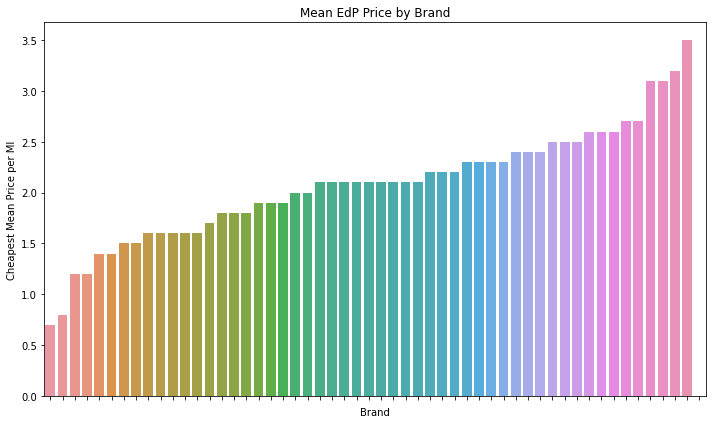

In [57]:
print(edp)
plt.figure(figsize=(10, 6))
sns.barplot(data=edp, x='brand', y='cheapest_value')
plt.xlabel('Brand')
plt.ylabel('Cheapest Mean Price per Ml')
plt.title('Mean EdP Price by Brand')
plt.xticks(rotation=45)
plt.gca().set_xticklabels([])
plt.tight_layout()
plt.show()

In [39]:
# rainbow_palette = sns.color_palette("rainbow", len(edc))
# plt.figure(figsize=(10, 6))
# sns.barplot(data=edc, x='brand', y='cheapest_value')
# plt.xlabel('Brand')
# plt.ylabel('Cheapest Mean Price per Ml')
# plt.title('Mean EdC Price by Brand')
# plt.xticks(rotation=45)
# plt.gca().set_xticklabels([])
# plt.tight_layout()
# plt.show()